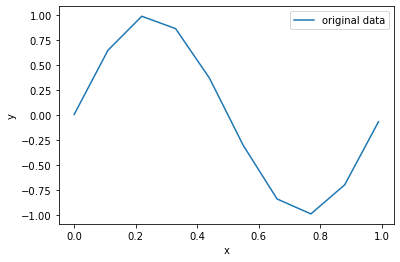

In [9]:
from numpy import *
x=linspace(0,0.99,10)
y=sin(2*pi*x)
noise=random.normal(0.0,0.01,10)
y = y + noise
from scipy.interpolate import *
p1 = polyfit(x,y,9)

from matplotlib.pyplot import *
%matplotlib inline
import numpy as np
import pandas as pd
import pylab as p
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plot(data['x'],data['y'])
xlabel('x')
ylabel('y')
legend(['original data'])

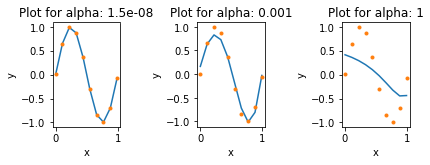

In [10]:
from sklearn.linear_model import Ridge
import pandas as pd
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        subplot(models_to_plot[alpha])
        tight_layout()
        plot(data['x'],y_pred)
        plot(data['x'],data['y'],'.')
        xlabel('x')
        ylabel('y')
        title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

for i in range(2,10):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,10)])
alpha_ridge = [1.5e-8,1e-3,1]
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(2,10)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,1)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1.5e-8:231,1e-3:232,1:233}
for i in range(3):
    ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

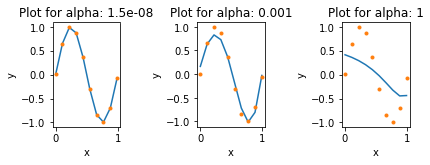

In [11]:
for i in range(2,10):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,10)])
alpha_ridge = [1.5e-8,1e-3,1]
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(2,10)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,1)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1.5e-8:231,1e-3:232,1:233}
for i in range(3):
    ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)